# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

In [1]:
# Ваш ответ здесь

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

In [2]:
# Ваш ответ здесь

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

In [3]:
# Ваш ответ здесь

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

Подключим необходимые библиотеки:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

Реализуем bagging:

In [5]:
def bagging(X, y, size):
    #Implement random sampling here
    index = np.random.randint(low=0, high=y.size, size=size)
    sample_X, sample_y = X[index], y[index]
    return sample_X, sample_y

Теперь реализуем сам RandomForest:

In [6]:
class RandomForest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, criterion='gini', max_depth=None, max_features='sqrt'):
        self.num_trees = num_trees
        self.criterion = criterion
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        size = y_train.size
        for i in range(self.num_trees):
            tree = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth,
                                          max_features=self.max_features)
            sample_X, sample_y = bagging(X_train, y_train, size)
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        pred = []
        for tree in self.trees:
            pred.append(tree.predict(X_test))
        pred = np.vstack(pred).T
        
        y_pred = []        
        for p in pred:
            c = Counter(p)
            y_pred.append(c.most_common(1)[0][0])
            
        return np.array(y_pred)

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

Сначала скачаем рассматриваемый датасет:

In [7]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2018-03-20 03:02:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ‘wine.data.3’

wine.data.3         100%[===================>]  10,53K  --.-KB/s    in 0,006s  

2018-03-20 03:02:06 (1,69 MB/s) - ‘wine.data.3’ saved [10782/10782]



Считаем данные:

In [8]:
columns = 'Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,' \
          'Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,' \
          'Hue,OD280/OD315 of diluted wines,Proline'
columns = columns.split(',')
winedf = pd.read_csv('wine.data', sep=',', names=columns)

In [9]:
winedf.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Разобьём данные на `object` и `target`, а также на `train` и `test`.

In [10]:
X, y = np.array(winedf[winedf.columns[1:]]), np.array(winedf[winedf.columns[0]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Попробуем обучить реализованный нами лес на `train`-е и посмотреть на `accuracy_score`.

In [11]:
rf = RandomForest(num_trees=15)
rf.fit(X_train, y_train)
accuracy_score(rf.predict(X_test), y_test)

1.0

Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра `num_trees`. Видны ли следы переобучения?

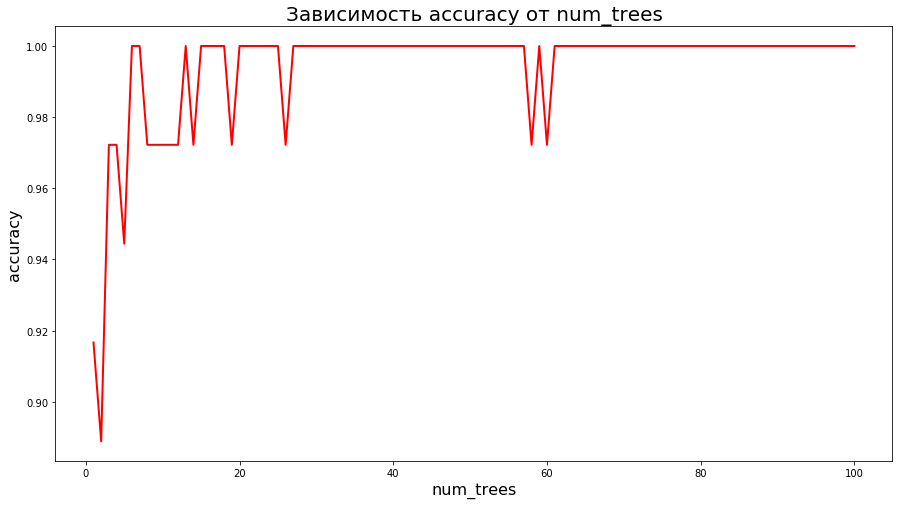

In [12]:
num_trees = np.arange(1, 101)
accuracy_rf = []

for n in num_trees:
    rf = RandomForest(num_trees=n)
    rf.fit(X_train, y_train)
    accuracy_rf.append(accuracy_score(rf.predict(X_test), y_test))
    
plt.figure(figsize=(15, 8))
plt.plot(num_trees, accuracy_rf, lw=2, c='r')
plt.title('Зависимость accuracy от num_trees', fontsize=20)
plt.xlabel('num_trees', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.show()

Как видно по графику, при маленьком размере леса он ошибается на нескольких объектах, но при увеличении размера он уже с большой вероятностью имеет на тестовой выборке `accuracy` $=1$. При этом есть колебания `accuracy_score`, ведь алгоритм всё таки рандомизированный.

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

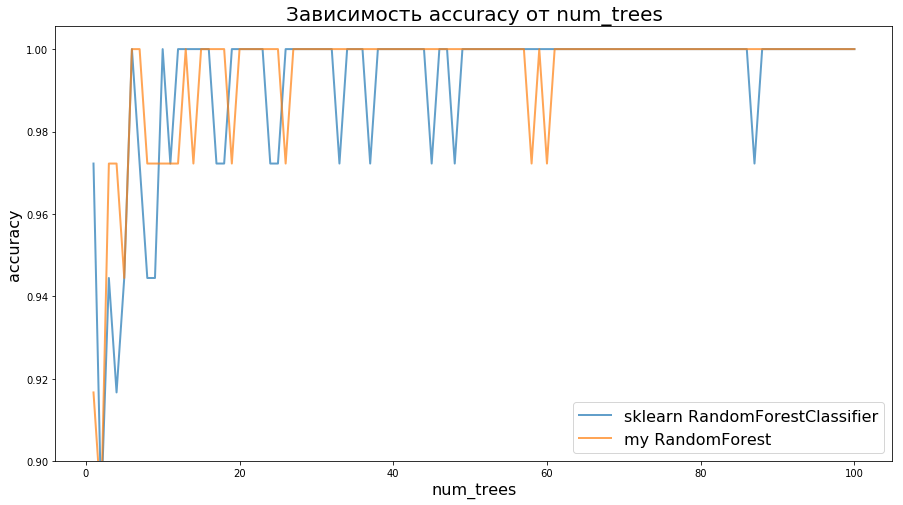

In [13]:
num_trees = np.arange(1, 101)
accuracy_skrf = []

for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    accuracy_skrf.append(accuracy_score(rf.predict(X_test), y_test))
    
plt.figure(figsize=(15, 8))
plt.plot(num_trees, accuracy_skrf, lw=2, alpha=0.7, label='sklearn RandomForestClassifier')
plt.plot(num_trees, accuracy_rf, lw=2, alpha=0.7, label='my RandomForest')
plt.title('Зависимость accuracy от num_trees', fontsize=20)
plt.xlabel('num_trees', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.ylim(ymin=0.9)
plt.show()

По графикам видно, что реализации получились крайне близкими по точности, так как достаточно быстро в обоих случаях `accuracy_score` достигает значения $1$, а с ростом `n_trees` всё реже отклоняется.

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

Реализуем класс `ModifiedRandomForest`, отнаследовав его от `RandomForest` и переопределив методы.

In [14]:
class ModifiedRandomForest(RandomForest):    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        if isinstance(self.max_features, int):
            max_features = self.max_features
        elif isinstance(self.max_features, float):
            max_features = int(X_train.shape[1] * self.max_features)
        elif self.max_features == 'sqrt':
            max_features = int(np.sqrt(X_train.shape[1]))
        elif self.max_features == 'log2':
            max_features = int(np.log2(X_train.shape[1]))
        elif self.max_features is None:
            max_features = X_train.shape[1]
        else:
            raise ValueError('max_feature has unsupported value: {}'.format(self.max_features))

        size = y_train.size
        self.features_index = []

        for i in range(self.num_trees):
            tree = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth,
                                          max_features=self.max_features)

            sample_X, sample_y = bagging(X_train, y_train, size)
            features_index = np.random.choice(range(X_train.shape[1]), replace=False, size=max_features)
            self.features_index.append(features_index)
            tree.fit(sample_X[:, features_index], sample_y)
            self.trees.append(tree)
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        pred = []
        for tree, features_index in zip(self.trees, self.features_index):
            pred.append(tree.predict(X_test[:, features_index]))
        pred = np.vstack(pred).T
        
        y_pred = []        
        for p in pred:
            c = Counter(p)
            y_pred.append(c.most_common(1)[0][0])
            
        return np.array(y_pred)

Теперь построим графики для сравнения двух реализаций `RandomForest`:

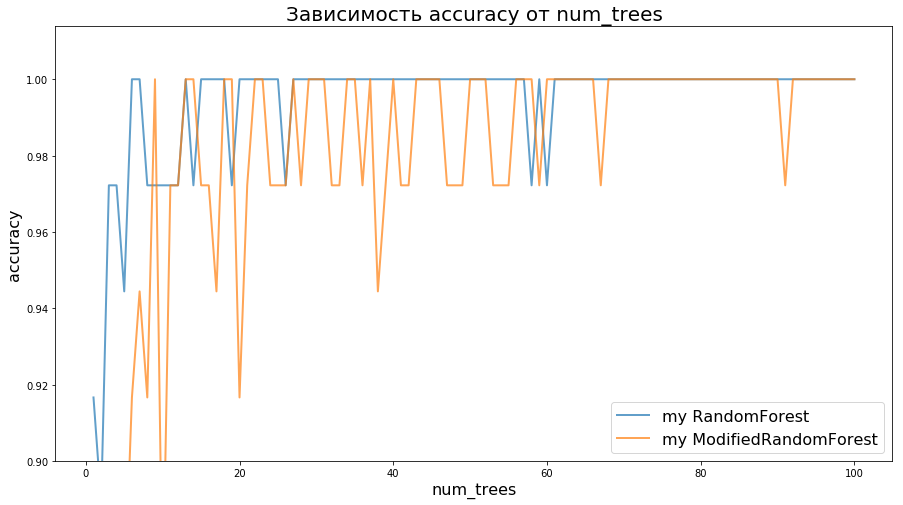

In [15]:
num_trees = np.arange(1, 101)
accuracy_mrf = []

for n in num_trees:
    rf = ModifiedRandomForest(num_trees=n)
    rf.fit(X_train, y_train)
    accuracy_mrf.append(accuracy_score(rf.predict(X_test), y_test))
    
plt.figure(figsize=(15, 8))
plt.plot(num_trees, accuracy_rf, lw=2, alpha=0.7, label='my RandomForest')
plt.plot(num_trees, accuracy_mrf, lw=2, alpha=0.7, label='my ModifiedRandomForest')
plt.title('Зависимость accuracy от num_trees', fontsize=20)
plt.xlabel('num_trees', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.ylim(ymin=0.9)
plt.show()

Как видно по графику, модифицированное дерево показывает достаточно высокую точность, но всё же чаще ошибается по сравнению с первой реализацией. 